In [22]:
import warnings
import tempfile
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import xml.etree.ElementTree as ET

from controller import SmartAPI
from IPython.display import display

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

### Step 1. Get the API   
In this case we are using metakg data and need to grab the metakg (`api.get_metakg()`) specifically once we get the api (`SmartAPI.get(mkg_id)`)

In [23]:
def metakg_request(mkg_id):
    """
    Get MetaKG API:
    Using the query input ID, get the metakg api
    """
    api = SmartAPI.get(mkg_id)
    mkg_api = api.get_metakg()
    return mkg_api


In [24]:
# for testing
query_id ="dc91716f44207d2e1287c727f281d339"
predicate = 'interacts_with'
write_file = False
edges = metakg_request(query_id)


In [5]:
edges[1] 

{'subject': 'SmallMolecule',
 'object': 'Disease',
 'predicate': 'treats',
 'provided_by': None,
 'api': {'name': 'BioThings Explorer (BTE) TRAPI',
  'smartapi': {'metadata': 'https://raw.githubusercontent.com/NCATS-Tangerine/translator-api-registry/master/biothings_explorer/smartapi.yaml',
   'id': 'dc91716f44207d2e1287c727f281d339',
   'ui': 'https://smart-api.info/ui/dc91716f44207d2e1287c727f281d339'},
  'tags': ['1.3.0',
   'meta_knowledge_graph',
   'query',
   'asyncquery',
   'translator',
   'trapi',
   'biothings',
   'bte-trapi'],
  'x-translator': {'component': 'ARA', 'team': ['Exploring Agent']}},
 'bte': {'query_operation': {'path': '/query',
   'method': 'post',
   'server': 'https://bte.transltr.io/v1',
   'path_params': None,
   'params': None,
   'request_body': None,
   'support_batch': True,
   'input_separator': ','}}}

### Step 2: Build the graphml tree  



Create the root element of the XML tree, setting the namespace for GraphML:

In [6]:
root = ET.Element('graphml')
root.set('xmlns', 'http://graphml.graphdrawing.org/xmlns')

In [7]:
# Define key for node data
key_node = ET.SubElement(root, 'key')
key_node.set('id', 'd1')
key_node.set('for', 'node')
key_node.set('attr.name', 'label')
key_node.set('attr.type', 'string')

Create the graph element and set its attributes:

In [8]:

# Define key for edge data
key_edge = ET.SubElement(root, 'key')
key_edge.set('id', 'd2')
key_edge.set('for', 'edge')
key_edge.set('attr.name', 'label')
key_edge.set('attr.type', 'string')


Set the graph edge default, which we set here to `directed`, we can change that to `undirected` if desired.

In [ ]:
graph = ET.SubElement(root, 'graph')
graph.set('id', 'G')
graph.set('edgedefault', 'directed') #'undirected'


Iterate over your the edges and create nodes and edges

In [9]:

for data in edges:
    node = ET.SubElement(graph, 'node')
    node.set('id', data['subject'])
    
    data_node = ET.SubElement(node, 'data')
    data_node.set('key', 'd1')
    data_node.text = data['subject']
    
    edge = ET.SubElement(graph, 'edge')
    edge.set('source', data['subject'])
    edge.set('target', data['object'])
    
    data_edge = ET.SubElement(edge, 'data')
    data_edge.set('key', 'd2')
    data_edge.text = data['predicate']

tree = ET.ElementTree(root)
tree.write('nu_graph.graphml')



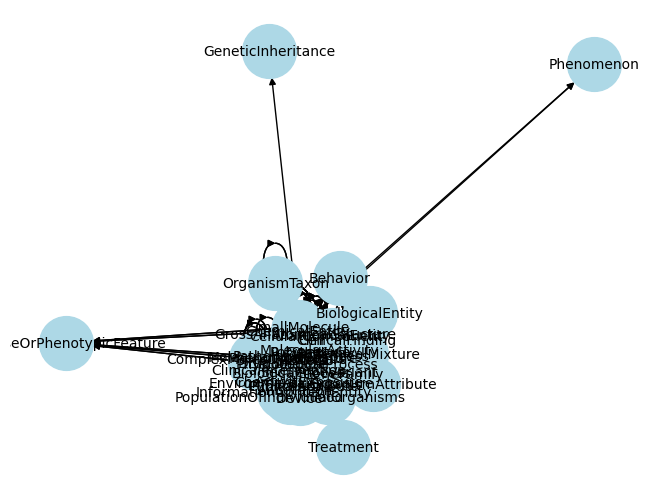

In [10]:
graph = nx.read_graphml('nu_graph.graphml')

nx.draw(graph, with_labels=True, node_color='lightblue', node_size=1500, font_size=10)
plt.show()

---

In [35]:

def metakg_request(mkg_id, predicate=None):
    """
    Get MetaKG API:
    Using the query input ID, get the metakg api
    """
    api = SmartAPI.get(mkg_id)
    mkg_api = api.get_metakg()
    if predicate:
        return [d for d in mkg_api if d.get('predicate') == predicate]
    else:
        return mkg_api

def edges2graphml(edges, outfile=None):
    root = ET.Element('graphml')
    root.set('xmlns', 'http://graphml.graphdrawing.org/xmlns')

    # Define key for node data
    key_node = ET.SubElement(root, 'key')
    key_node.set('id', 'd1')
    key_node.set('for', 'node')
    key_node.set('attr.name', 'label')
    key_node.set('attr.type', 'string')


    # Define key for edge data
    key_edge = ET.SubElement(root, 'key')
    key_edge.set('id', 'd2')
    key_edge.set('for', 'edge')
    key_edge.set('attr.name', 'label')
    key_edge.set('attr.type', 'string')
    graph = ET.SubElement(root, 'graph')
    graph.set('id', 'G')
    graph.set('edgedefault', 'directed') #'undirected'

    # iterate over edges and fill in data
    for data in edges:
        node = ET.SubElement(graph, 'node')
        node.set('id', data['subject'])
        
        data_node = ET.SubElement(node, 'data')
        data_node.set('key', 'd1')
        data_node.text = data['subject']
        
        edge = ET.SubElement(graph, 'edge')
        edge.set('source', data['subject'])
        edge.set('target', data['object'])
        
        data_edge = ET.SubElement(edge, 'data')
        data_edge.set('key', 'd2')
        data_edge.text = data['predicate']

    tree = ET.ElementTree(root)
    if outfile:
        write_graphml(tree, outfile)

def write_graphml(tree, outfile):
    tree.write(outfile)

def plot_graphml(file):
    graph = nx.read_graphml(file)

    nx.draw(graph, with_labels=True, node_color='lightblue', node_size=1500, font_size=10)
    plt.show()




### Testing New Functions

In [30]:
# for testing
query_id ="dc91716f44207d2e1287c727f281d339"
predicate = 'derives_from'
edges = metakg_request(query_id, predicate)


In [31]:
edges[0]

{'subject': 'SmallMolecule',
 'object': 'SmallMolecule',
 'predicate': 'derives_from',
 'provided_by': None,
 'api': {'name': 'BioThings Explorer (BTE) TRAPI',
  'smartapi': {'metadata': 'https://raw.githubusercontent.com/NCATS-Tangerine/translator-api-registry/master/biothings_explorer/smartapi.yaml',
   'id': 'dc91716f44207d2e1287c727f281d339',
   'ui': 'https://smart-api.info/ui/dc91716f44207d2e1287c727f281d339'},
  'tags': ['1.3.0',
   'meta_knowledge_graph',
   'query',
   'asyncquery',
   'translator',
   'trapi',
   'biothings',
   'bte-trapi'],
  'x-translator': {'component': 'ARA', 'team': ['Exploring Agent']}},
 'bte': {'query_operation': {'path': '/query',
   'method': 'post',
   'server': 'https://bte.transltr.io/v1',
   'path_params': None,
   'params': None,
   'request_body': None,
   'support_batch': True,
   'input_separator': ','}}}

In [34]:
file="23_graph.graphml"
graphml_content = edges2graphml(edges, file)

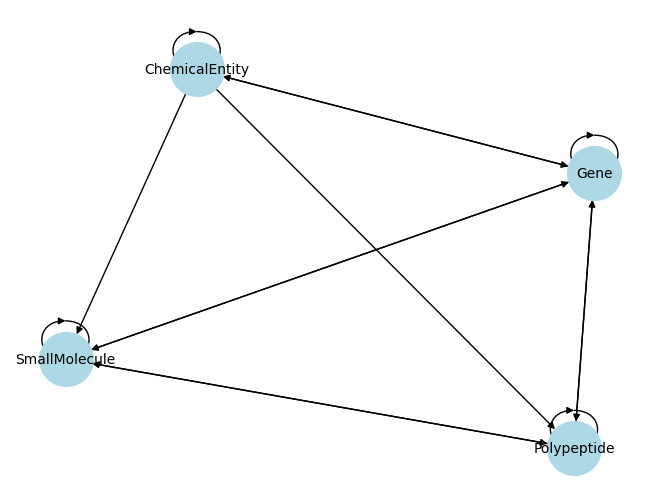

In [37]:
plot_graphml(file)

---

In [ ]:
def test_graphml():
    query= 